In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import tensorflow as tf
import tensorflow_datasets as tfds

### Carregando os Dados

In [2]:
dataDir = '/media/mateus/usarLinux/tensorflow/'

In [3]:
treino, label_treino = tfds.load('voc', split=('train[:70%]'), with_info=True, data_dir=dataDir)

In [4]:
teste, label_teste = tfds.load('voc', split='test[:70%]',  with_info=True, data_dir=dataDir)

In [5]:
nomes_classes = label_treino.features['labels'].names

In [6]:
print(nomes_classes)

['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']


### Pré-Processamento e visualização das Imagens

In [16]:
def redimensionarImagem(imagens, label_feature):
    label_info = label_feature 
    tamanho_alvo = (32, 32)  # Tamanho desejado das imagens
    imagens_np = []
    labels_image = []
    for exemplo in imagens:
        imagem = exemplo['image']
        imagem_redimensionada = tf.image.resize(imagem, tamanho_alvo)  # Redimensionar a imagem
        imagem_np = imagem_redimensionada.numpy()  # Converter para array NumPy
        imagens_np.append(imagem_np)

        labels = exemplo['objects']['label']
        rótulos_string = [label_info(label.numpy()) for label in labels]
        labels_image.append(rótulos_string)

    imagens_np = np.array(imagens_np)
    #labels_np = np.array(labels_image)

    # Converter a lista de arrays NumPy em um único array NumPy
    return np.array(imagens_np), labels_image

In [17]:
imagem_treino, labels_treino = redimensionarImagem(treino, label_treino.features['labels'].int2str)
imagem_teste, labels_teste =  redimensionarImagem(teste, label_teste.features['labels'].int2str)

In [18]:
imagem_teste = imagem_teste / 255.0
imagem_treino = imagem_treino / 255.0

In [19]:
print(imagem_teste.shape)

(3466, 32, 32, 3)


In [23]:
def visualiza_imagens(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i][0])
    plt.show()

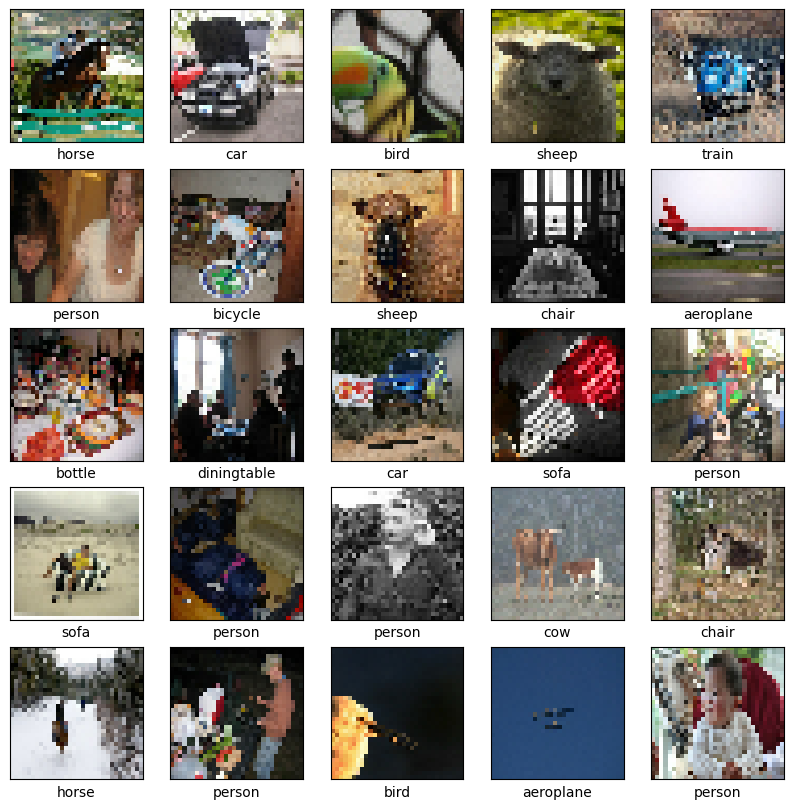

In [24]:
visualiza_imagens(imagem_treino, labels_treino)